In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import gaussian_kde
from scipy.stats import multivariate_normal, norm
import seaborn as sns

# Bivariate Gaussian

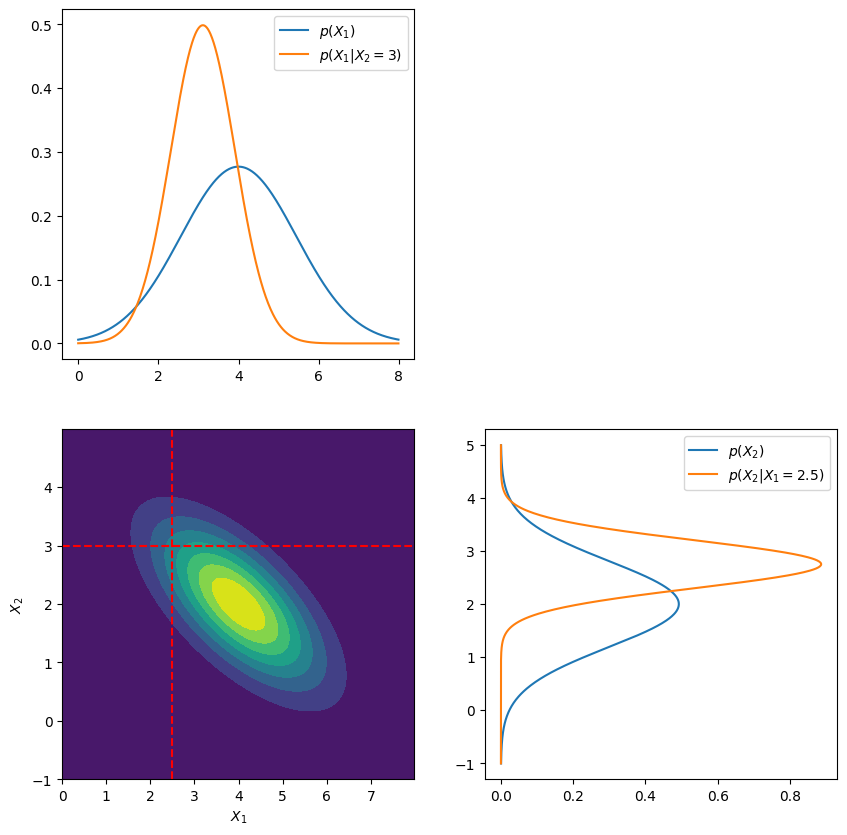

In [16]:
mu = np.array([4, 2])
sigma = np.array([[1.44, -0.72],[-0.72, 0.81]])

#Joint multivariate normal distribution 
joint_mvn = multivariate_normal(mu, sigma)

#marginal distributions
marginal_x = norm(mu[0], sigma[0,0])
marginal_y = norm(mu[1], sigma[1,1])

#conditional distributions
def cond_x(given_y):
    mu_x = mu[0] + sigma[0,1]/sigma[1,1] * (given_y - mu[1])
    sigma_x = sigma[0,0] - sigma[0,1]**2/sigma[1,1]
    return norm(mu_x, sigma_x)

def cond_y(given_x):
    mu_y = mu[1] + sigma[0,1]/sigma[0,0] * (given_x - mu[0])
    sigma_y = sigma[1,1] - sigma[0,1]**2/sigma[0,0]
    return norm(mu_y, sigma_y)

given_y = 3
given_x = 2.5
conditional_x = cond_x(given_y=given_y)
conditional_y = cond_y(given_x=given_x)



#plotting
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(223)
x, y = np.mgrid[0:8:.01, -1:5:.01]
pos = np.dstack((x, y))
contour = ax.contourf(x, y, joint_mvn.pdf(pos),  cmap='viridis')
ax.axvline(given_x, color='r', linestyle='--')
ax.axhline(given_y, color='r', linestyle='--')
# cbar =  fig.colorbar(contour, ax=ax, )
# cbar.set_label(r'$p(X_1, X_2)$')
ax.set_xlabel(r'$X_1$')
ax.set_ylabel(r'$X_2$')
ax.set_aspect('auto')  

ax = fig.add_subplot(221)
ax.plot(x[:, 0], marginal_x.pdf(x[:, 0]), label=r'$p(X_1)$')
ax.plot(x[:, 0], conditional_x.pdf(x[:, 0]), label=r'$p(X_1|X_2=3)$')
ax.legend()

ax = fig.add_subplot(224)
ax.plot(marginal_y.pdf(y[0, :]),y[0, :], label=r'$p(X_2)$')
ax.plot(conditional_y.pdf(y[0, :]), y[0, :], label=r'$p(X_2|X_1=2.5)$')
ax.legend()


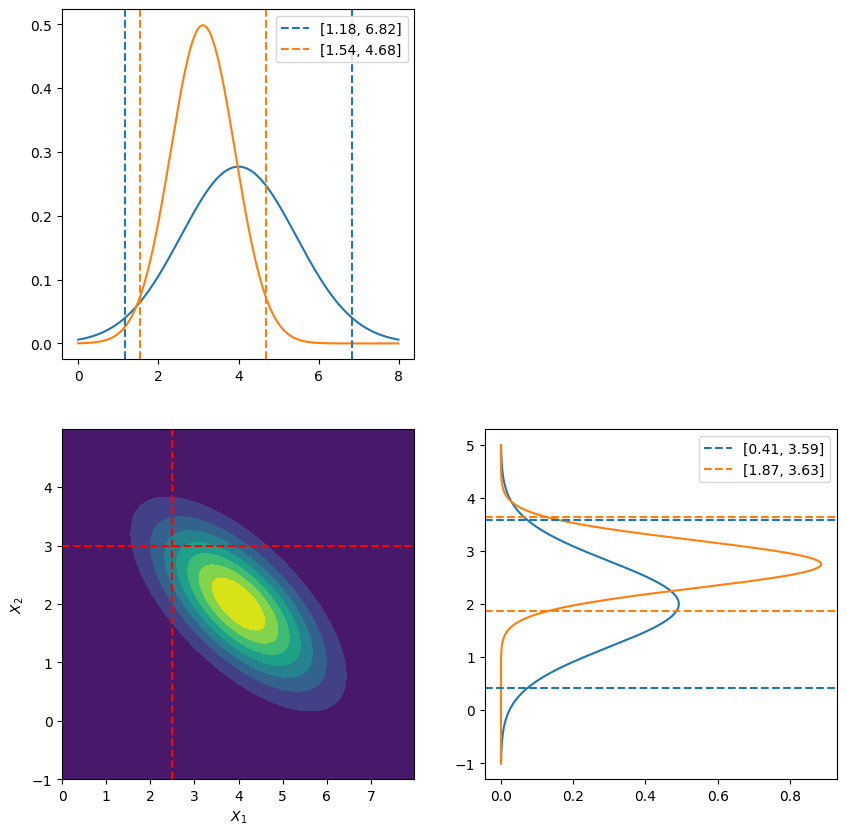

In [15]:
#in order to calculate the confidence interval we will use the Percent Point function
#which is the inverse of the cumulative distribution function

#confidence interval for x 
low_marginal_x = norm.ppf(0.025, loc=marginal_x.mean(), scale=marginal_x.std())
high_marginal_x = norm.ppf(0.975, loc=marginal_x.mean(), scale=marginal_x.std())

low_conditional_x = norm.ppf(0.025, loc=conditional_x.mean(), scale=conditional_x.std())
high_conditional_x = norm.ppf(0.975, loc=conditional_x.mean(), scale=conditional_x.std())

#confidence interval for y
low_marginal_y = norm.ppf(0.025, loc=marginal_y.mean(), scale=marginal_y.std())
high_marginal_y = norm.ppf(0.975, loc=marginal_y.mean(), scale=marginal_y.std())

low_conditional_y = norm.ppf(0.025, loc=conditional_y.mean(), scale=conditional_y.std())
high_conditional_y = norm.ppf(0.975, loc=conditional_y.mean(), scale=conditional_y.std())


#plotting
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(223)
x, y = np.mgrid[0:8:.01, -1:5:.01]
pos = np.dstack((x, y))
contour = ax.contourf(x, y, joint_mvn.pdf(pos),  cmap='viridis')
ax.axvline(given_x, color='r', linestyle='--')
ax.axhline(given_y, color='r', linestyle='--')
# cbar =  fig.colorbar(contour, ax=ax, )
# cbar.set_label(r'$p(X_1, X_2)$')
ax.set_xlabel(r'$X_1$')
ax.set_ylabel(r'$X_2$')
ax.set_aspect('auto')  

ax = fig.add_subplot(221)
ax.plot(x[:, 0], marginal_x.pdf(x[:, 0]), )
ax.plot(x[:, 0], conditional_x.pdf(x[:, 0]), )
ax.axvline(low_marginal_x, color='tab:blue', linestyle='--', label=f'[{low_marginal_x:.2f}, {high_marginal_x:.2f}]')
ax.axvline(high_marginal_x, color='tab:blue', linestyle='--')
ax.axvline(low_conditional_x, color='tab:orange', linestyle='--', label=f'[{low_conditional_x:.2f}, {high_conditional_x:.2f}]')
ax.axvline(high_conditional_x, color='tab:orange', linestyle='--')
ax.legend()

ax = fig.add_subplot(224)
ax.plot(marginal_y.pdf(y[0, :]),y[0, :], )
ax.plot(conditional_y.pdf(y[0, :]), y[0, :], )
ax.axhline(low_marginal_y, color='tab:blue', linestyle='--', label=f'[{low_marginal_y:.2f}, {high_marginal_y:.2f}]')
ax.axhline(high_marginal_y, color='tab:blue', linestyle='--')
ax.axhline(low_conditional_y, color='tab:orange', linestyle='--', label=f'[{low_conditional_y:.2f}, {high_conditional_y:.2f}]')
ax.axhline(high_conditional_y, color='tab:orange', linestyle='--')  
ax.legend()

When conditioning the standard deviation is always smaller or equal to the standard deviation obtain after marginalization. This is because when you condition over parameters you do not have error propagation effects. 

# 7.a) Draw samples using the Cholesky decomposition of the covariance

In [123]:

eigenvalues = np.linalg.eigvals(sigma)
print(f'The two eigenvalues are: {eigenvalues[0]:.2f} and {eigenvalues[1]:.2f}, so the matrix is positive definite')

L = np.linalg.cholesky(sigma)
print(f' Verify that Cov -  {{L $\cdot$ L^T}} is a zero matrix:{sigma - L@L.T}')

#generate independence sample u ~ N(0, I)
u = np.random.normal(size=(200_000, 2))

#compute the dependent sample x = mu + L@u
samples = mu.reshape(2, 1) + L@u.T
x, y = samples[0, :], samples[1, :]

# Calculate the confidence interval for the samples
low_x = np.quantile(x, 0.025)
high_x = np.quantile(x, 0.975)

low_y = np.quantile(y, 0.025)
high_y = np.quantile(y, 0.975)


The two eigenvalues are: 1.91 and 0.34, so the matrix is positive definite
 Verify that Cov -  {L $\cdot$ L^T} is a zero matrix:[[0. 0.]
 [0. 0.]]


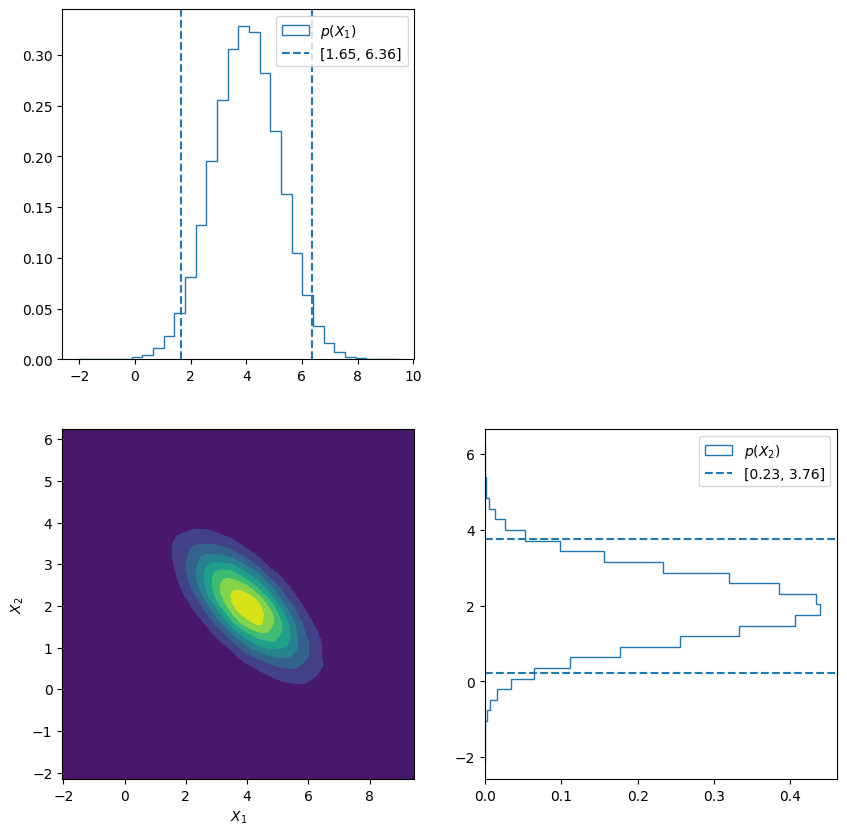

In [124]:
#plotting
xy = np.vstack([x,y])
kde = gaussian_kde(xy)
# Generate grid
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

# Evaluate KDE on grid
f = np.reshape(kde(positions).T, xx.shape)

# Plot filled contour
fig = plt.figure(figsize=(10, 10))
ax =  fig.add_subplot(223)
ax.contourf(xx, yy, f)
ax.set_xlabel(r'$X_1$')
ax.set_ylabel(r'$X_2$')

ax = fig.add_subplot(221)
ax.hist(x, bins=30, density=True,histtype='step', label=r'$p(X_1)$');
ax.axvline(low_x, color='tab:blue', linestyle='--', label=f'[{low_x:.2f}, {high_x:.2f}]')
ax.axvline(high_x, color='tab:blue', linestyle='--')
ax.legend()

ax = fig.add_subplot(224)
ax.hist(y, bins=30, density=True, histtype='step', orientation='horizontal', label=r'$p(X_2)$');
ax.axhline(low_y, color='tab:blue', linestyle='--', label=f'[{low_y:.2f}, {high_y:.2f}]')
ax.axhline(high_y, color='tab:blue', linestyle='--')
ax.legend()

# 7.b) Draw samples using the Metropolis-Hasting
